In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline
df=pd.read_csv('perrin-freres-monthly-champagne-.csv')
## Cleaning up the data
df.columns=["Month","Sales"]
df.dropna(axis=0, inplace=True)
# Convert Month into Datetime
df['Month']=pd.to_datetime(df['Month'])

In [39]:
train = df.iloc[:84, :]
test = df.iloc[84:, :]

In [40]:
train.shape, test.shape

((84, 2), (21, 2))

In [41]:
train.tail()

,Month,Sales
79,1970-08-01,1738.0
80,1970-09-01,5221.0
81,1970-10-01,6424.0
82,1970-11-01,9842.0
83,1970-12-01,13076.0


In [42]:
test.head()

,Month,Sales
84,1971-01-01,3934.0
85,1971-02-01,3162.0
86,1971-03-01,4286.0
87,1971-04-01,4676.0
88,1971-05-01,5010.0


In [43]:
train.set_index('Month',inplace=True)

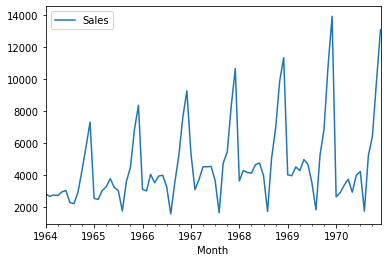

In [44]:
train.plot()

In [45]:
model=sm.tsa.statespace.SARIMAX(train['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

/home/rasel/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/rasel/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [54]:
forecast=results.predict(start=1,end=84)
train['forecast'] = forecast
train.head()

/home/rasel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Sales,forecast
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,2481.860822
1964-03-01,2755.0,2565.299271
1964-04-01,2721.0,2695.135447
1964-05-01,2946.0,2703.219458


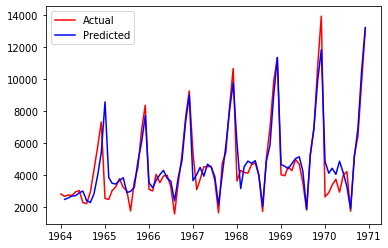

In [55]:
# Visualising the results
plt.plot(train['Sales'], color = 'red', label = 'Actual')
plt.plot(train['forecast'], color = 'blue', label = 'Predicted')
plt.legend()
plt.show()

In [57]:
test.set_index('Month',inplace=True)
forecast=results.predict(start=85,end=105)
test['forecast'] = forecast
test.head()

/home/rasel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Sales,forecast
Month,,
1971-01-01,3934.0,NaN
1971-02-01,3162.0,2752.677755
1971-03-01,4286.0,3298.227264
1971-04-01,4676.0,3612.195676
1971-05-01,5010.0,3002.860271


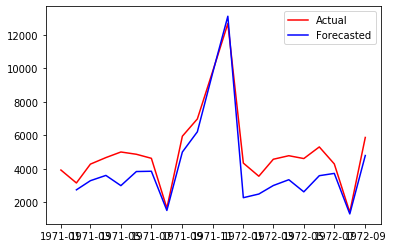

In [59]:
# Visualising the results
plt.plot(test['Sales'], color = 'red', label = 'Actual')
plt.plot(test['forecast'], color = 'blue', label = 'Forecasted')
plt.legend()
plt.show()